In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/Users/anfisso/Downloads/app')
import f_

### Функция ниже для создания PDF отчёта

In [2]:
# Пути к шрифтам
FONT_SERIF = "../app/fonts/DejaVuSerif.ttf"
FONT_SERIF_BOLD = "../app/fonts/DejaVuSerif-Bold.ttf"
FONT_SERIF_ITALIC = "../app/fonts/DejaVuSerif-Italic.ttf"

class PDFReport(FPDF):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Добавляем все варианты шрифта
        self.add_font("Serif", "", FONT_SERIF, uni=True)
        self.add_font("Serif", "B", FONT_SERIF_BOLD, uni=True)
        self.add_font("Serif", "I", FONT_SERIF_ITALIC, uni=True)
        self.set_auto_page_break(auto=True, margin=20)
        self.set_margins(20, 20, 20)

    def title_page(self, report_title, author, course, school):
        """Создает титульную страницу с улучшенным дизайном"""
        self.add_page()
        
        # Заголовок отчета
        self.set_font("Serif", "B", 20)
        self.ln(60)
        self.multi_cell(0, 12, report_title, align="C")
        
        self.ln(15)
        self.set_font("Serif", "", 16)
        self.cell(0, 10, "Отчет", 0, 1, "C")
        
        # Разделительная линия
        self.ln(20)
        self.set_draw_color(100, 100, 100)
        self.line(60, self.get_y(), 150, self.get_y())
        
        # Информация об авторе (внизу страницы)
        self.set_y(-80)
        self.set_font("Serif", "", 12)
        self.ln(10)
        
        # Блок с информацией об авторе
        # self.set_font("Serif", "B", 12)
        # self.cell(0, 8, "Выполнил:", 0, 1, "R")
        self.set_font("Serif", "", 12)
        self.cell(0, 8, author, 0, 1, "R")
        self.ln(5)
        
        # self.set_font("Serif", "B", 12)
        # self.cell(0, 8, "Курс:", 0, 1, "R")
        self.set_font("Serif", "", 12)
        self.cell(0, 8, course, 0, 1, "R")
        self.ln(5)
        
        # self.set_font("Serif", "B", 12)
        # self.cell(0, 8, "Учебное заведение:", 0, 1, "R")
        self.set_font("Serif", "", 12)
        self.cell(0, 8, school, 0, 1, "R")

    def header(self):
        """Заголовок страницы (кроме титульной)"""
        if self.page_no() == 1:
            return
        
        self.set_font("Serif", "I", 9)
        self.set_text_color(100, 100, 100)
        self.cell(0, 10, "Анализ пользовательской активности", 0, 0, "L")
        self.cell(0, 10, f"Страница {self.page_no()}", 0, 1, "R")
        self.ln(5)
        
        # Линия под заголовком
        self.set_draw_color(200, 200, 200)
        self.line(20, 25, 190, 25)
        self.set_text_color(0, 0, 0)
        self.ln(5)

    def section_title(self, title):
        """Создает заголовок секции с отступами"""
        self.ln(10)
        self.set_font("Serif", "B", 16)
        self.set_fill_color(240, 240, 240)
        self.cell(0, 12, title, 0, 1, "L", fill=True)
        self.ln(8)

    def add_metrics(self, total_sessions, avg_session_time, avg_dau, unique_actions, 
                   avg_actions_per_session, peak_hour, peak_activity_count, 
                   most_active_day, most_active_day_count):
        """Добавляет страницу с основными показателями в улучшенном формате"""
        self.add_page()
        self.section_title("Основные показатели")
        
        # Создаем таблицу показателей
        metrics = [
            ("Всего сессий", f"{total_sessions:,}"),
            ("Среднее время сессии", str(avg_session_time)),
            ("Средний DAU", f"{int(avg_dau):,}"),
            ("Количество уникальных действий", f"{unique_actions:,}"),
            ("Среднее действий за сессию", f"{avg_actions_per_session:.2f}"),
            ("Пиковый час активности", f"{peak_hour}:00 ({peak_activity_count:,} действий)"),
            ("Самый активный день", f"{most_active_day} ({most_active_day_count:,} действий)")
        ]
        
        self.set_font("Serif", "", 12)
        for metric_name, metric_value in metrics:
            # Название показателя
            self.set_font("Serif", "B", 12)
            self.cell(80, 10, metric_name + ":", 0, 0, "L")
            
            # Значение показателя
            self.set_font("Serif", "", 12)
            self.cell(0, 10, metric_value, 0, 1, "L")
            self.ln(2)

    def add_action_distribution(self, action_distribution_table, action_distribution_img_path):
        """Добавляет страницу с распределением действий"""
        self.add_page()
        self.section_title("Распределение действий пользователей")
        
        # Заголовок таблицы
        self.set_font("Serif", "B", 11)
        self.set_fill_color(230, 230, 230)
        self.cell(70, 10, "Действие", 1, 0, "C", fill=True)
        self.cell(50, 10, "Количество", 1, 0, "C", fill=True)
        self.cell(40, 10, "Доля (%)", 1, 1, "C", fill=True)
        
        # Данные таблицы
        self.set_font("Serif", "", 11)
        self.set_fill_color(250, 250, 250)
        
        for i, (action, count, percent) in enumerate(action_distribution_table):
            fill = i % 2 == 0  # Чередующиеся цвета строк
            self.cell(70, 8, str(action), 1, 0, "L", fill=fill)
            self.cell(50, 8, f"{count:,}", 1, 0, "R", fill=fill)
            self.cell(40, 8, f"{percent:.1f}%", 1, 1, "R", fill=fill)
        
        # График, если есть
        if action_distribution_img_path:
            self.ln(15)
            self.set_font("Serif", "I", 11)
            self.cell(0, 8, "Графическое представление:", 0, 1)
            self.ln(5)
            
            # Центрируем изображение
            img_width = 140
            x_position = (210 - img_width) / 2
            self.image(action_distribution_img_path, x=x_position, w=img_width)

    def add_time_analysis(self, hourly_activity_img_path, weekly_activity_img_path):
        """Добавляет страницу с временным анализом активности"""
        self.add_page()
        self.section_title("Временной анализ активности")
        
        # График активности по часам
        if hourly_activity_img_path:
            self.set_font("Serif", "B", 13)
            self.cell(0, 10, "Активность по часам суток:", 0, 1)
            self.ln(5)
            
            # Центрируем изображение
            img_width = 150
            x_position = (210 - img_width) / 2
            self.image(hourly_activity_img_path, x=x_position, w=img_width)
            self.ln(15)
        
        # График активности по дням недели
        if weekly_activity_img_path:
            self.set_font("Serif", "B", 13)
            self.cell(0, 10, "Активность по дням недели:", 0, 1)
            self.ln(5)
            
            # Центрируем изображение
            img_width = 150
            x_position = (210 - img_width) / 2
            self.image(weekly_activity_img_path, x=x_position, w=img_width)

    def add_conclusions(self, conclusions_list):
        """Добавляет страницу с выводами"""
        self.add_page()
        self.section_title("Заключение и выводы")
        
        self.set_font("Serif", "", 12)
        self.multi_cell(0, 8, "На основе проведенного анализа пользовательской активности "
                             "в социальной сети были получены следующие результаты:")
        self.ln(10)
        
        # Выводы в виде нумерованного списка
        for i, conclusion in enumerate(conclusions_list, 1):
            self.set_font("Serif", "B", 12)
            self.cell(10, 8, f"{i}.", 0, 0, "L")
            self.set_font("Serif", "", 12)
            
            # Многострочный вывод с отступом
            x_start = self.get_x()
            y_start = self.get_y()
            self.multi_cell(0, 8, conclusion)
            self.ln(3)

    def footer(self):
        """Нижний колонтитул"""
        if self.page_no() == 1:  # Не показывать на титульной странице
            return
            
        self.set_y(-15)
        self.set_font("Serif", "I", 8)
        self.set_text_color(100, 100, 100)
        self.cell(0, 10, f"Стр. {self.page_no()}", 0, 0, "C")


def create_pdf_report_fpdf(
    total_sessions,
    avg_session_time,
    avg_dau,
    unique_actions,
    avg_actions_per_session,
    peak_hour,
    peak_activity_count,
    most_active_day,
    most_active_day_count,
    action_distribution_table,
    hourly_activity_img_path,
    weekly_activity_img_path,
    action_distribution_img_path,
    filename="Отчет_Анализ_Данных_Социальной_Сети.pdf",
    report_title="Анализ пользовательской активности в социальной сети",
    author="Анфиса Ганнова",
    course="Data Science. Осенний поток 2025",
    school="Школа аналитики и машинного обучения"
):
    """
    Создает профессиональный PDF-отчет с улучшенным дизайном
    """
    pdf = PDFReport()
    
    # Титульная страница
    pdf.title_page(report_title, author, course, school)
    
    # Основные показатели
    pdf.add_metrics(
        total_sessions, avg_session_time, avg_dau, unique_actions,
        avg_actions_per_session, peak_hour, peak_activity_count,
        most_active_day, most_active_day_count
    )
    
    # Распределение действий
    pdf.add_action_distribution(action_distribution_table, action_distribution_img_path)
    
    # Временной анализ
    pdf.add_time_analysis(hourly_activity_img_path, weekly_activity_img_path)
    
    # Выводы
    conclusions_list = [
        f"В ходе анализа было обработано {total_sessions:,} пользовательских сессий, "
        f"что обеспечивает статистическую значимость полученных результатов.",
        
        f"Среднее время одной пользовательской сессии составляет {avg_session_time}, "
        f"что указывает на умеренную вовлеченность пользователей.",
        
        f"Средний показатель ежедневно активных пользователей (DAU) равен {int(avg_dau):,} человек, "
        f"что является базовой метрикой для оценки активности платформы.",
        
        f"Пиковая активность наблюдается в {peak_hour}:00 часов с {peak_activity_count:,} действиями, "
        f"что позволяет оптимизировать время публикации контента и проведения акций.",
        
        f"Наиболее активным днем является {most_active_day} с {most_active_day_count:,} действиями, "
        f"что следует учитывать при планировании маркетинговых активностей.",
        
        f"Среднее количество действий за сессию составляет {avg_actions_per_session:.2f}, "
        f"что характеризует интенсивность взаимодействия пользователей с платформой."
    ]
    
    pdf.add_conclusions(conclusions_list)
    
    # Сохранение файла
    pdf.output(filename)
    print(f"✅ PDF-отчет успешно создан: {filename}")
    return filename

In [3]:
# Загрузка и предварительная обработка данных
df = pd.read_csv('actions_setka_fin.csv')

In [4]:
# знакомство с данными
f_.xlsx(df, info=None, title='Table', max_height=200, scroll=False, #custom_metrics={"NaN все столбцы": lambda x: x['session_id'].nunique()},
     bg_head="linear-gradient(to right top, #1a1a2e, #25253d, #32314d, #403e5e, #4f4c70)")

session_id,user_id,action_name,action_time
1.0,255323.0,post_view,2025-01-22 23:26:44
1.0,255323.0,message,2025-01-22 23:38:42
1.0,255323.0,post_view,2025-01-22 23:52:43
1.0,255323.0,comment,2025-01-22 23:58:09


In [5]:
f_.df_info(df)

In [6]:
# Удаляем дубликаты
df.drop_duplicates(inplace=True)
df['action_time'] = pd.to_datetime(df['action_time'])

# Русификация названий действий
translation_dict = {
    'post_view': 'просмотр_поста',
    'message': 'сообщение',
    'comment': 'комментарий',
    'share': 'поделиться',
    'like': 'лайк',
    'profile_view': 'просмотр_профиля',
    'subscribe': 'подписка',
    'asddjs': np.nan,
    'comment ': 'комментарий'
}

df['action_name_ru'] = df['action_name'].map(translation_dict)
df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
df = df.dropna(how='all')

In [7]:
print(df.isnull().sum())

# Сортируем данные
df = df.sort_values(by=['session_id', 'action_time'])
df['date'] = df['action_time'].dt.date
df['hour'] = df['action_time'].dt.hour
df['day_of_week'] = df['action_time'].dt.day_name()

session_id        2
user_id           3
action_name       1
action_time       1
action_name_ru    4
dtype: int64


In [8]:
display(df.sample(3))

,session_id,user_id,action_name,action_time,action_name_ru,date,hour,day_of_week
962990,81821.0,285335.0,message,2025-01-09 02:23:19,сообщение,2025-01-09,2.0,Thursday
864994,73524.0,329051.0,post_view,2025-01-01 09:16:39,просмотр_поста,2025-01-01,9.0,Wednesday
537844,45735.0,232110.0,post_view,2025-01-18 07:30:27,просмотр_поста,2025-01-18,7.0,Saturday


In [9]:
# 1. Количество сессий
total_sessions = df['session_id'].nunique()
print(f"\n1. Количество сессий: {total_sessions:,}")


1. Количество сессий: 123,453


In [10]:
# 2. Среднее время сессии
session_stats = df.groupby('session_id')['action_time'].agg(['min', 'max']).reset_index()
session_stats['duration_seconds'] = (session_stats['max'] - session_stats['min']).dt.total_seconds()

avg_duration_seconds = session_stats['duration_seconds'].mean()
hours = int(avg_duration_seconds // 3600)
minutes = int((avg_duration_seconds % 3600) // 60)
seconds = int(avg_duration_seconds % 60)
print(f"2. Среднее время сессии: {hours:02d}:{minutes:02d}:{seconds:02d}")

2. Среднее время сессии: 01:27:34


In [11]:
display(session_stats.sample(3))

,session_id,min,max,duration_seconds
117123,117125.0,2025-01-30 16:00:58,2025-01-30 16:47:52,2814.0
3514,3515.0,2025-01-23 11:29:10,2025-01-23 12:21:34,3144.0
25445,25447.0,2025-01-09 00:20:17,2025-01-09 01:16:18,3361.0


In [12]:
# 3. DAU (Daily Active Users)
daily_unique_users = df.groupby('date')['user_id'].nunique().reset_index()
daily_unique_users.columns = ['Date', 'DAU']
avg_dau = daily_unique_users['DAU'].mean()
print(f"3. Средний DAU: {avg_dau:.0f} пользователей")

3. Средний DAU: 3914 пользователей


In [13]:
# 4. Количество уникальных действий
unique_actions = df['action_name_ru'].nunique()
print(f"4. Количество типов действий: {unique_actions}")

4. Количество типов действий: 7


In [14]:
# 5. Среднее количество действий за сессию
avg_actions_per_session = df.groupby('session_id')['action_name_ru'].count().mean()
print(f"5. Среднее количество действий за сессию: {avg_actions_per_session:.2f}")

5. Среднее количество действий за сессию: 11.77


In [15]:
# 6. Распределение действий по типам
action_distribution = df['action_name_ru'].value_counts()
print(f"\n6. Распределение действий по типам:")
for action, count in action_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"   {action}: {count:,} ({percentage:.1f}%)")


6. Распределение действий по типам:
   просмотр_поста: 537,758 (37.0%)
   просмотр_профиля: 268,803 (18.5%)
   лайк: 215,038 (14.8%)
   комментарий: 161,399 (11.1%)
   подписка: 107,909 (7.4%)
   сообщение: 107,736 (7.4%)
   поделиться: 54,034 (3.7%)


In [16]:
# 7. Активность по часам дня
hourly_activity = df.groupby('hour').size()
peak_hour = hourly_activity.idxmax()
peak_activity = hourly_activity.max()
print(f"\n7. Пиковая активность: {peak_hour}:00 ({peak_activity:,} действий)")


7. Пиковая активность: 10.0:00 (61,988 действий)


In [17]:
# 8. Активность по дням недели
weekly_activity = df.groupby('day_of_week').size()
most_active_day = weekly_activity.idxmax()
print(f"8. Самый активный день недели: {most_active_day} ({weekly_activity[most_active_day]:,} действий)")

8. Самый активный день недели: Thursday (243,755 действий)


In [18]:

total_sessions = df['session_id'].nunique()
session_stats = df.groupby('session_id')['action_time'].agg(['min', 'max']).reset_index()
session_stats['duration_seconds'] = (session_stats['max'] - session_stats['min']).dt.total_seconds()
avg_duration_seconds = session_stats['duration_seconds'].mean()
hours = int(avg_duration_seconds // 3600)
minutes = int((avg_duration_seconds % 3600) // 60)
seconds = int(avg_duration_seconds % 60)
avg_session_time = f"{hours:02d}:{minutes:02d}:{seconds:02d}"

daily_unique_users = df.groupby('date')['user_id'].nunique().reset_index()
avg_dau = daily_unique_users['user_id'].mean()

unique_actions = df['action_name_ru'].nunique()
avg_actions_per_session = df.groupby('session_id')['action_name_ru'].count().mean()

action_distribution = df['action_name_ru'].value_counts()
action_distribution_table = [
    (action, int(count), round(count / len(df) * 100, 1))
    for action, count in action_distribution.items()
]

hourly_activity = df.groupby('hour').size()
peak_hour = int(hourly_activity.idxmax())
peak_activity_count = int(hourly_activity.max())

weekly_activity = df.groupby('day_of_week').size()
most_active_day = weekly_activity.idxmax()
most_active_day_count = int(weekly_activity[most_active_day])

#  Создадим визуализацию данных

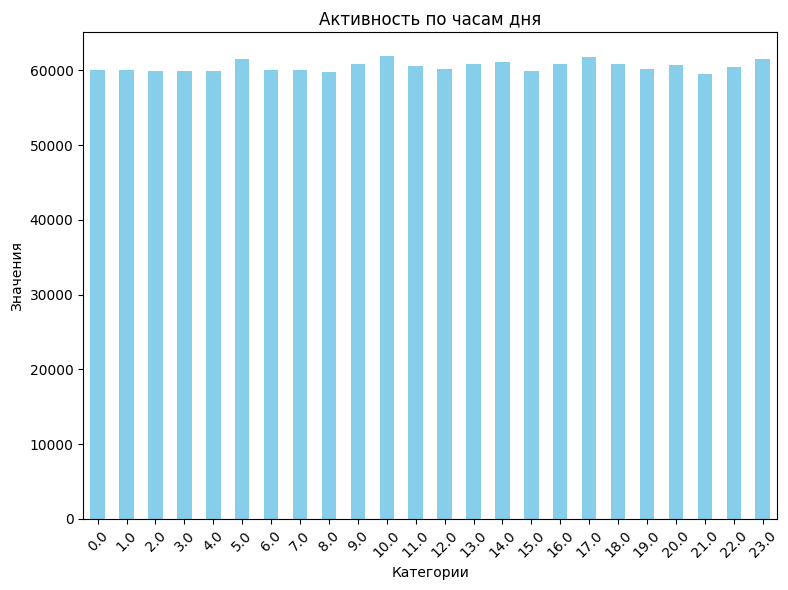

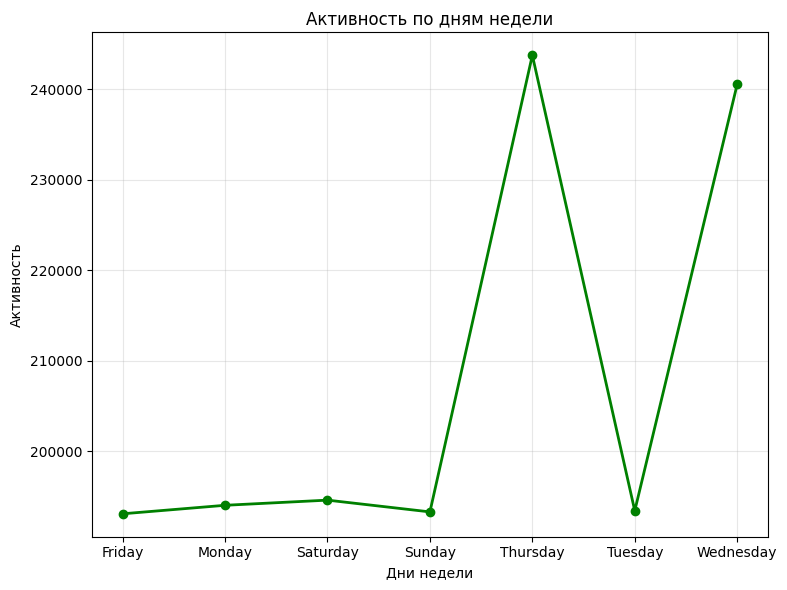

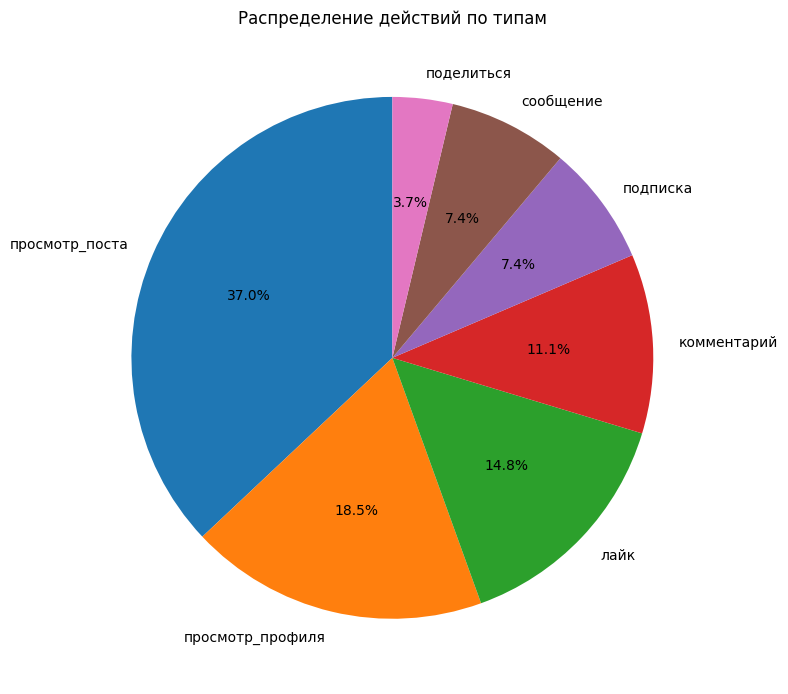

In [19]:
# 1. Столбчатая диаграмма
plt.figure(figsize=(8, 6))
hourly_activity.plot(kind='bar', color='skyblue')
plt.title('Активность по часам дня')
plt.xlabel('Категории')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Линейный график
plt.figure(figsize=(8, 6))
weekly_activity.plot(kind='line', marker='o', color='green', linewidth=2, markersize=6)
plt.title('Активность по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Активность')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('line_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Круговая диаграмма
plt.figure(figsize=(8, 8))
action_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Распределение действий по типам')
plt.ylabel('')  # Убираем подпись оси Y
plt.tight_layout()
plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
create_pdf_report_fpdf(
    total_sessions=total_sessions,
    avg_session_time=avg_session_time,
    avg_dau=int(avg_dau),
    unique_actions=unique_actions,
    avg_actions_per_session=round(avg_actions_per_session, 2),
    peak_hour=peak_hour,
    peak_activity_count=peak_activity_count,
    most_active_day=most_active_day,
    most_active_day_count=most_active_day_count,
    action_distribution_table=action_distribution_table,
    hourly_activity_img_path='bar_chart.png',
    weekly_activity_img_path='line_chart.png',
    action_distribution_img_path='pie_chart.png',
    filename="report.pdf",
    report_title="Анализ пользовательской активности в социальной сети",
    author="Анфиса Ганнова",
    course="Аналитика данных",
    school="ProductStar"
)


✅ PDF-отчет успешно создан: report.pdf


'report.pdf'